## Estimation of pi by Monte Carlo simulations

Pi is estimated through Monte Carlo simulations, the procedure of which is as follows:

1) Pick a pair of random numbers (x,y) between 0 and 1.
2) If the (x,y) lies within the unit circle in the x-y plane, take this iteration as a hit.
3) Repeat this for a certain number of trials (n_trials).
4) The value of pi is estimated by $ 4 \times \frac{\# \, of \, hits}{\# \, of \, trials} $

The error is shown in a log-log plot as a function of number of trials and a linear regression is done. It can be seen that the data can be fitted with a straight line with $slope \approx -0.5 $.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

[2.8, 2.88, 3.204, 3.1188, 3.14016, 3.1453]


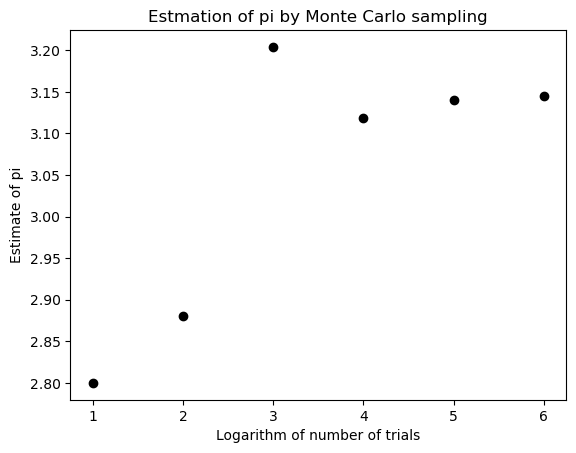

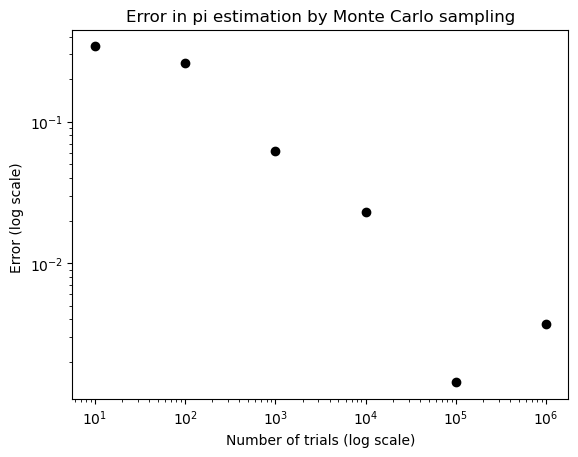

Slope of the fitted line: -0.48697487572197795


In [39]:
def pi_estimate(n_trials):
    n_hits = 0
    for i in range(n_trials):
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        if x*x + y*y < 1:
            n_hits += 1
    pi_estimate = 4 * (n_hits/n_trials)
    return pi_estimate

n_list = [10**i for i in range(1, 7)]
pi_estimate_list = []
error_list = []

for n_trials in n_list:
    pi = pi_estimate(n_trials)
    pi_estimate_list.append(pi)
    error = np.abs(np.pi - pi)
    error_list.append(error)
    
print(pi_estimate_list)

fit = numpy.polyfit(numpy.log10(n_list), numpy.log10(error_list), 1)
fitted_line = np.polyval(fit,np.log10(n_list))

plt.figure()
plt.plot([i for i in range(1,7)],pi_estimate_list,'ko')
plt.xlabel('Logarithm of number of trials')
plt.ylabel('Estimate of pi')
plt.title('Estmation of pi by Monte Carlo sampling')
plt.show()

plt.loglog(n_list, error_list, 'ko')
plt.xlabel('Number of trials (log scale)')
plt.ylabel('Error (log scale) ')
plt.title('Error in pi estimation by Monte Carlo sampling')
plt.show()

print('Slope of the fitted line:', fit[0])